In [5]:
from scipy.stats import chisquare
from scipy import stats
import urllib.request
import string
import requests
from bs4 import BeautifulSoup
import pandas as pd
import multiprocessing
import gensim
import sys
import spacy
nlp=spacy.load('en')
import seaborn as sns
from nltk.tokenize import WordPunctTokenizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from scipy import spatial
from collections import Counter
import numpy as np
from collections import defaultdict
from pprint import pprint
from gensim import corpora
import re
import logging
import requests
import urllib 
import re
import sys
import zipfile
from glob import glob
import statsmodels.api as sm
import scipy
import scipy.stats as ss
from scipy.signal import savgol_filter
import random
np.set_printoptions(precision=2)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.corpus import names
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [1]:
# Load your usual SpaCy model (one of SpaCy English models)
import spacy
nlp = spacy.load('en')

# load NeuralCoref and add it to the pipe of SpaCy's model
import neuralcoref
coref = neuralcoref.NeuralCoref(nlp.vocab)
nlp.add_pipe(coref, name='neuralcoref')

In [2]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()
    
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def cultureD2(model, words):
    cultures = []
    for word in words:
        if (word[0] in model.wv.vocab) & (word[1] in model.wv.vocab):
            cultures.append(normalize(normalize(model[word[0]]) - normalize(model[word[1]])))
        else:
            print(word)
    culturev = normalize(np.mean(cultures, axis=0))
    return culturev

def storyv(model,words):
    veclist=[]
    for w in words:
        if w in model.wv.vocab:
            veclist.append(normalize(model[w]))
    storyv=normalize(np.mean(veclist,axis=0))
    return storyv

def projection(storyv, culturev):
    # cosine similarity
    return (1 - spatial.distance.cosine(storyv, culturev))
           
def cosine2angle(i):
    return np.arccos(i) / np.pi * 180 #长度换角度

def normalized(x):
    x= np.array(x)
    return (x-np.mean(x))/np.std(x)

def normalization(x):
    x=np.array(x)
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [3]:
swords = [
    ['success','failure'],
    ['succeed','fail'],
    ['lucky', 'unlucky'],
    ['fortunate', 'unfortunate'],
    ['happy', 'unhappy'],
    ['glad', 'sad'],
    ['joy', 'sorrow'],
    ['smile', 'tear']
] # success words

In [5]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

# model = gensim.models.KeyedVectors.load_word2vec_format('english_fiction_sgns_gensim_1990.txt')

2019-05-27 10:24:22,614 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin
2019-05-27 10:26:20,420 : INFO : loaded (3000000, 300) matrix from GoogleNews-vectors-negative300.bin


In [6]:
success_vector = cultureD2(model, swords)
success_word = [i[0] for i in model.similar_by_vector(success_vector, 1)]

2019-05-24 18:10:35,910 : INFO : precomputing L2-norms of word weight vectors


In [7]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [8]:
import re, sys, getopt

PUNCTUATION = [ch for ch in """(){}[]<>!?.:;,`'"@#$%^&*+-|=~/\\_"""]
LETTERS     = [ch for ch in "abcdefghijklmnopqrstuvwxyz"]
CONSONANTS  = [ch for ch in "bcdfghjklmnpqrstvwxz"] # Need this for Mr. Mss. abbreviations.
WHITESPACE  = [ch for ch in " \t\n\r\f\v"]          # Need this to split words.
DASHES      = [ch for ch in u"鈥撯€�"]                  # Not to be confused with hyphen.

is_uppercase   = lambda s: len(s)>0 and s==s.upper()                          # Goodbye => True
is_capitalized = lambda s: len(s)>0 and s[0].isalpha() and s[0]==s[0].upper() # GOODBYE => True

digits = re.compile("^[0-9]+$")
is_int = lambda s: digits.search(s) != None

# regex pattern for entities: &amp; &#164;
entity = "&[a-z]+;|&#[0-9]+;"

class Range(dict):
    
    def __init__(self, items=[]):
        dict.__init__(self, items)
        self.patterns = []
        
    def __contains__(self, str):
        if dict.__contains__(self, str): 
            return True
        for p in self.patterns:
            if p.search(str) != None: 
                return True
        return False

def in_any(word, ranges=[]):
    for rng in ranges:
        if word in rng: return True
        
abbreviations = [
    "Adm.", "Ala.", "Ariz.", "Ark.", "Aug.", "B.C.", "Bancorp.", "Bhd.", "Brig.", "Bros.", "CO.", 
    "CORP.", "COS.", "ca.", "Calif.", "Capt.", "Cie.", "Cmdr.", "Co.", "Col.", "Colo.", "Conn.", "Corp.", 
    "Cos.", "Cpl.", "D-Mass.", "D.C.", "Dec.", "Del.", "Dept.", "Dr.", "E.g.", "Etc.", "Ex.", "Exch.", 
    "Feb.", "Fla.", "Fri.", "Ga.", "Gen.", "Gov.", "INC.", "Ill.", "Inc.", "Ind.", "Jan.", "Jansz.", 
    "Jos.", "Jr.", "Kan.", "Ky.", "L.A.", "La.", "Lt.", "Ltd.", "Maj.", "Mass.", "Md.", "Messrs.", 
    "Mfg.", "Mich.", "Minn.", "Miss.", "Mo.", "Mon.", "Mr.", "Mrs.", "Ms.", "Mt.", "N.C.", "N.J.", 
    "N.Y.", "NFATc.", "Neb.", "Nev.", "No.", "Nos.", "Nov.", "O.J.", "Oct.", "Okla.", "Ont.", "Ore.", 
    "P.T.", "Pa.", "Ph.", "Prof.", "Prop.", "Pty.", "R.I.", "R.J.", "Rep.", "Reps.", "Rev.", "S.C.", 
    "Sat.", "Sen.", "Sens.", "Sep.", "Sept.", "Sgt.", "Sol.", "Sr.", "St.", "Sun.", "Tenn.", "Tex.", 
    "Thu.", "Tue.", "U.K.", "U.N.", "U.S.", "Va.", "Vt.", "W.J.", "W.Va.", "Wash.", "Wed.", "Wis.", 
    "Wyo.", "a.m.", "cit.", "def.", "ed.", "eds.", "e.g.", "etc.", "ft.", "i.e.", "op.", "p.m.", "pp.", 
    "sc.", "v.", "vs.", "Biol.", "Chem.", "beta4.", "Struct.", "Funct.", "Natl.", "Acad.", "Sci.",
    "Biochem.", "Cell.", "Proc.", "Res.", "Lond.", "Nat.", "Dev.", "Camb.", "Profilin.", "Thymosin-beta4."
]

class Abbreviations(Range):
    
    def __init__(self, known=[]):
        """ A dictionary of known abbreviations, extended with patterns of likely abbreviations.
            word in Abbreviations() == True if word is a known or likely abbreviation.
            Periods in English are ambiguous,
            marking end of sentence, abbreviation, decimal point or ellipsis.
            - Simple rule: "every point is a sentence break" is 93.20% correct for Brown corpus.
            - Fix decimal points: 93,64% correct.
            - Fix single letter abbreviations (T. De Smedt), alternating letters (i.e. U.S.),
              and capital letter followed by consonants (Mr. Assn.): 97.7% correct.
            - Fix with dictionary of known abbreviations: up to 99,07 accuracy.
            http://bulba.sdsu.edu/~malouf/ling571/13-token-bw.pdf
        """
        Range.__init__(self, [(x,True) for x in known])
        self.patterns = [
            re.compile("^[A-Za-z]\.$"),                       # single letter, "T. De Smedt"
            re.compile("^([A-Za-z]\.)+$"),                    # alternating letters, "U.S."
            #re.compile(".+\.[,;]$"),                         # followed by punctuation, "dept.,"
            re.compile("^[A-Z]["+"|".join(CONSONANTS)+"]+.$") # capital followed by consonants, "Mr."
        ]
        
    def __contains__(self, word):
        return word.endswith(".") and Range.__contains__(self, word)

abbreviations = Abbreviations(abbreviations)
# # from https://www.clips.uantwerpen.be/BiographTA/tokenizer.py

In [9]:
def pre_process(data):
    for w in abbreviations:
        data = data.replace(w,' ')
    data = data.replace('\r',' ').replace('\n',' ').replace('\t',' ')
    data = re.split('[.?!]',data) # cut the sentence
    tknzr = WordPunctTokenizer()
    data = [tknzr.tokenize(i) for i in data]
    data=[i for i in data if len(i)>1]
    return data

In [10]:
with open('./stopword.txt','r') as f:
    stopword=f.readlines()
stopword=[i.split('\n')[0] for i in stopword]

### emotion diction

In [22]:
len(model.vocab)

3000000

In [33]:
# diction={}
# for i,j in enumerate(model.vocab):
#     flushPrint(i)
#     sim = 90-cosine2angle(projection(model[j],success_vector))
#     diction[j]= sim

2999999

In [1]:
import json
with open("diction.txt","r") as f:
    diction = json.loads(f.readline())

In [12]:
# with open("diction.txt","w") as f:
#     f.write(json.dumps(diction))

In [2]:
with open("diction.txt","r") as f:
    diction = json.loads(f.readline())

In [3]:
len(diction)

3000000

### book

In [13]:
def get_maintext_lines_gutenberg(raw_text):
    lines = raw_text.split("\n")
    start_book_i = 0
    end_book_i = len(lines)-1
    # pass 1, this format is easy and gets 78.9% of books
    start1="START OF THIS PROJECT GUTENBERG EBOOK"
    start2="START OF THE PROJECT GUTENBERG EBOOK"
    end1="END OF THIS PROJECT GUTENBERG EBOOK"
    end2="END OF THE PROJECT GUTENBERG EBOOK"
    end3="END OF PROJECT GUTENBERG"
    for j,line in enumerate(lines):
        if (start1 in line) or (start2 in line):
            # and "***" in line and start_book[i] == 0 and j<.25*len(lines):
            start_book_i = j
        end_in_line = end1 in line or end2 in line or end3 in line.upper()
        if end_in_line and (end_book_i == (len(lines)-1)):
            #  and "***" in line and j>.75*len(lines)
            end_book_i = j
    # pass 2, this will bring us to 99%
    if (start_book_i == 0) and (end_book_i == len(lines)-1):
        for j,line in enumerate(lines):
            if ("end" in line.lower() or "****" in line) and  "small print" in line.lower() and j<.5*len(lines):
                start_book_i = j
            if "end" in line.lower() and "project gutenberg" in line.lower() and j>.75*len(lines):
                end_book_i = j
        # pass three, caught them all (check)
        if end_book_i == len(lines)-1:
            for j,line in enumerate(lines):
                if "THE END" in line and j>.9*len(lines):
                    end_book_i = j
    return lines[(start_book_i+1):(end_book_i)]

In [14]:
def chunkify(lines):
    # put them back together...
    raw_text = "\n".join(lines)
    # remove extra whitespace
    raw_text_1 = re.sub("\n[\\s]+?\n","\n\n",raw_text)
    # remove singleton newlines
    raw_text_2 = re.sub(r"([^\n])\n([^\n])",r"\1 \2",raw_text_1)
    raw_text_3 = raw_text_2.rstrip().lstrip()

    # three levels of significance
    # single newlines were already discarded (insignificant)
    # double newlines are real line breaks
    # triple newlines (or more) separate content

    # split on those triples (or more)
    big_chunks = re.split("\n\n\n+",raw_text_3)

    # now break them into the paragraphs
    small_chunks = list(map(lambda x: re.split("\n\n",x),big_chunks))
    combined_chunks = []
    [combined_chunks.extend(el) for el in small_chunks]
    combined_chunks = [i for i in combined_chunks if i[-1] in '!"#$%&\'()+,-./:;<=>?@[\\]^_`{|}~']
#     combined_chunks = ' '.join(combined_chunks)
#     combined_chunks = []

#     for i in range(len(small_chunks)):
#         for j in range(len(small_chunks[i])):
#             combined_chunks.append((i,j,small_chunks[i][j]))
    return combined_chunks
#     return small_chunks

In [306]:
book=pd.read_csv('./gutenberg/metadata.csv')
book=book[book['lang']=='English']
# book['class']=book['loc_class'].apply(lambda x: [i[0] for i in x.split('|') if i[0] in [str(chr(i)) for i in range(65,91)]])
# book['judge']=book['class'].apply(lambda x:True if 'P' in x else False)
# book=book[book['judge']==True]

In [307]:
book['len'].describe()

count     37501.000000
mean       3161.890696
std        6341.892102
min           0.000000
25%         879.000000
50%        2373.000000
75%        4255.000000
max      945426.000000
Name: len, dtype: float64

In [308]:
book['count'].describe()

count    3.750100e+04
mean     5.405320e+04
std      8.140605e+04
min      0.000000e+00
25%      1.557200e+04
50%      4.191200e+04
75%      7.386700e+04
max      9.198577e+06
Name: count, dtype: float64

In [111]:
no=book['no'].values

In [112]:
len(no)

25838

In [201]:
for i,n in enumerate(no):
    try:
        flushPrint(i)
        f = open('./gutenberg/'+n+'.txt',"r",encoding='ISO-8859-1')
        rawtext = f.read()
        f.close()
        lines = get_maintext_lines_gutenberg(rawtext)
        chunked = chunkify(lines)
        data=pre_process(' '.join(chunked)) #break into sentences
        data=['\t'.join(['_'.join([w, str(diction[w])]) for w in s if w in diction]) for s in data]
        with open('./book/'+n+'.txt',"w") as f:
            for d in data:
                f.write(d+"\n")
    except Exception as e:
        print(e)
        pass

39[Errno 2] No such file or directory: './gutenberg/40.txt'
42[Errno 2] No such file or directory: './gutenberg/43.txt'
69[Errno 2] No such file or directory: './gutenberg/70.txt'
73[Errno 2] No such file or directory: './gutenberg/74.txt'
75[Errno 2] No such file or directory: './gutenberg/76.txt'
83[Errno 2] No such file or directory: './gutenberg/84.txt'
85[Errno 2] No such file or directory: './gutenberg/86.txt'
88[Errno 2] No such file or directory: './gutenberg/89.txt'
90[Errno 2] No such file or directory: './gutenberg/91.txt'
92[Errno 2] No such file or directory: './gutenberg/93.txt'
99[Errno 2] No such file or directory: './gutenberg/100.txt'
115[Errno 2] No such file or directory: './gutenberg/116.txt'
118[Errno 2] No such file or directory: './gutenberg/119.txt'
134[Errno 2] No such file or directory: './gutenberg/135.txt'
141[Errno 2] No such file or directory: './gutenberg/142.txt'
146[Errno 2] No such file or directory: './gutenberg/147.txt'
154

KeyboardInterrupt: 

In [384]:
files=glob('./book/*.txt')

In [386]:
files=[i.split('/')[-1].split('.')[0] for i in files]

In [388]:
len(book[~book['no'].isin(files)])

10659

In [62]:
count=[]
for i,n in enumerate(no):
    try:
        flushPrint(i)
        with open('./book/'+n+'.txt',"r") as f:
            a=f.readlines()
        c=[]
        for j in a:
            c.append(len(j.split('\t')))
        count.append([n,np.sum(c),len(c)])
    except:
        pass

48160

In [64]:
d=dict(zip([i[0] for i in count],[i[1] for i in count]))
d1=dict(zip([i[0] for i in count],[i[2] for i in count]))

book['count']=book['no'].apply(lambda x: d[x] if x in d else np.nan)
book['len']=book['no'].apply(lambda x: d1[x] if x in d else np.nan)

book.to_csv('./gutenberg/metadata.csv',index=False)

### long movie

In [15]:
def chunkify(lines):
    # put them back together...
    raw_text = "\n".join(lines)
    # remove extra whitespace
    raw_text_1 = re.sub("\n[\\s]+?\n","\n\n",raw_text)
    # remove singleton newlines
    raw_text_2 = re.sub(r"([^\n])\n([^\n])",r"\1 \2",raw_text_1)
    raw_text_3 = raw_text_2.rstrip().lstrip()

    # three levels of significance
    # single newlines were already discarded (insignificant)
    # double newlines are real line breaks
    # triple newlines (or more) separate content

    # split on those triples (or more)
    big_chunks = re.split("\n\n\n+",raw_text_3)

    # now break them into the paragraphs
    small_chunks = list(map(lambda x: re.split("\n\n",x),big_chunks))
    combined_chunks = []
    [combined_chunks.extend(el) for el in small_chunks]
    combined_chunks = [i for i in combined_chunks]
#     combined_chunks = ' '.join(combined_chunks)
#     combined_chunks = []

#     for i in range(len(small_chunks)):
#         for j in range(len(small_chunks[i])):
#             combined_chunks.append((i,j,small_chunks[i][j]))
    return combined_chunks
#     return small_chunks

In [27]:
movie_type=pd.read_csv('./movie_type.csv')

In [28]:
len(movie_type)

1109

In [29]:
name=movie_type['name'].values

In [30]:
for i,n in enumerate(name):
    try:
        flushPrint(i)
        f = open('./imsdb/'+n+'.txt',"r")
        rawtext = f.read()
        f.close()
        lines = get_maintext_lines_gutenberg(rawtext)
        chunked = chunkify(lines)
        data=pre_process(' '.join(chunked)) #break into sentences
        data=['\t'.join(['_'.join([w, str(diction[w])]) for w in s if w in diction]) for s in data]
        with open('./long_movie/'+n+'.txt',"w") as f:
            for d in data:
                f.write(d+"\n")
    except Exception as e:
        print(e)
        pass

13[Errno 2] No such file or directory: './imsdb/48-Hrs.txt'
31[Errno 2] No such file or directory: './imsdb/After.txt'
41[Errno 2] No such file or directory: './imsdb/Alien-vs.txt'
219[Errno 2] No such file or directory: './imsdb/Cecil-B.txt'
333[Errno 2] No such file or directory: './imsdb/E.txt'
351[Errno 2] No such file or directory: './imsdb/Escape-From-L.txt'
396[Errno 2] No such file or directory: './imsdb/Freddy-vs.txt'
411[Errno 2] No such file or directory: './imsdb/G.txt'
412[Errno 2] No such file or directory: './imsdb/G.txt'
592[Errno 2] No such file or directory: './imsdb/L.txt'
712[Errno 2] No such file or directory: './imsdb/Mrs.txt'
865[Errno 2] No such file or directory: './imsdb/S.txt'
870[Errno 2] No such file or directory: './imsdb/Saving-Mr.txt'
938[Errno 2] No such file or directory: './imsdb/St.txt'
965[Errno 2] No such file or directory: './imsdb/Sunset-Blvd.txt'
984[Errno 2] No such file or directory: './imsdb/Talented-Mr.txt'
1108

In [31]:
count=[]
for i,n in enumerate(name):
    try:
        flushPrint(i)
        with open('./long_movie/'+n+'.txt',"r") as f:
            a=f.readlines()
        c=[]
        for j in a:
            c.append(len(j.split('\t')))
        count.append([n,np.sum(c),len(c)])
    except:
        pass

1108

In [32]:
d=dict(zip([i[0] for i in count],[i[1] for i in count]))
d1=dict(zip([i[0] for i in count],[i[2] for i in count]))

movie_type['count']=movie_type['name'].apply(lambda x: d[x] if x in d else np.nan)
movie_type['len']=movie_type['name'].apply(lambda x: d1[x] if x in d else np.nan)

movie_type.to_csv('./movie_type.csv',index=False)

In [313]:
movie_type=pd.read_csv('./movie_type.csv')

In [314]:
movie_type['len'].describe()

count    1093.000000
mean     2742.877402
std       668.023441
min       299.000000
25%      2367.000000
50%      2736.000000
75%      3126.000000
max      6402.000000
Name: len, dtype: float64

In [315]:
movie_type['count'].describe()

count     1093.000000
mean     22007.098811
std       5361.550623
min       3105.000000
25%      19082.000000
50%      21939.000000
75%      24911.000000
max      49022.000000
Name: count, dtype: float64

### short movie

In [316]:
IMDB=pd.read_csv('./IMDB/IMDB_e2.csv')

In [319]:
name=IMDB['tconst'].values

In [325]:
name[0][2:]

'0002605'

In [326]:
for i,n in enumerate(name):
    try:
        flushPrint(i)
        f = open('./IMDB/synopsis/'+n[2:]+'.txt',"r")
        rawtext = f.read()
        data=pre_process(rawtext) #break into sentences
        data=['\t'.join(['_'.join([w, str(diction[w])]) for w in s if w in diction]) for s in data]
        with open('./short_movie/'+n+'.txt',"w") as f:
            for d in data:
                f.write(d+"\n")
    except Exception as e:
        print(e)
        pass

9684

In [345]:
count=[]
for i,n in enumerate(name):
    flushPrint(i)
    with open('./short_movie/'+n+'.txt',"r") as f:
        a=f.readlines()
    c=[]
    for j in a:
        c.append(len(j.split('\t')))
    count.append([n,np.sum(c)])

9684

In [354]:
d=dict(zip([i[0] for i in count],[i[1] for i in count]))

In [355]:
IMDB['count']=IMDB['tconst'].apply(lambda x: d[x])

In [359]:
IMDB.to_csv('./IMDB/IMDB_e2.csv',index=False)

In [45]:
book['class']=book['loc_class'].apply(lambda x: [i[0] for i in x.split('|') if i[0] in [str(chr(i)) for i in range(65,91)]])
book['judge']=book['class'].apply(lambda x:True if 'P' in x else False)
book=book[book['judge']==True]

In [46]:
len(book)

1326

In [19]:
IMDB=pd.read_csv('./IMDB/IMDB_e2.csv')
IMDB=IMDB.dropna(axis=0,how='any',subset=['tp','emotion','character'])

In [20]:
IMDB=IMDB[IMDB['len']>5]

In [21]:
IMDB['avg']=IMDB['count']/IMDB['len']

In [22]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

In [23]:
IMDB['character']=IMDB['character'].apply(lambda x: eval_(x))
IMDB['lead_gender']=IMDB['character'].apply(lambda x: x[2] if type(x)==list else np.nan)

In [24]:
IMDB_m=IMDB[IMDB['lead_gender']=='male']
IMDB_f=IMDB[IMDB['lead_gender']=='female']

In [55]:
len(IMDB)

6562

In [12]:
movie_type=pd.read_csv('./movie_type_e2.csv')

In [13]:
movie_type['avg']=movie_type['count']/movie_type['len']

In [14]:
movie_type['character']=movie_type['character'].apply(lambda x: eval_(x))
movie_type['lead_gender']=movie_type['character'].apply(lambda x: x[1] if type(x)==list else np.nan)

In [15]:
len(movie_type)

912

In [16]:
movie_type_m=movie_type[movie_type['lead_gender']=='male']
movie_type_f=movie_type[movie_type['lead_gender']=='female']

In [17]:
book=pd.read_csv('./book.csv')

In [18]:
book['character']=book['character'].apply(lambda x: eval_(x))
book['lead_gender']=book['character'].apply(lambda x: x[1] if type(x)==list else np.nan)

In [72]:
# book=pd.read_csv('./gutenberg/metadata.csv')
# book_list=pd.read_csv('./book_list.csv')
# nos=list(book_list['id'].values)
# book=book[book['no'].isin(nos)]

In [26]:
book['avg']=book['count']/book['len']

In [27]:
book_m=book[book['lead_gender']=='male']
book_f=book[book['lead_gender']=='female']

In [87]:
len(book)

1326

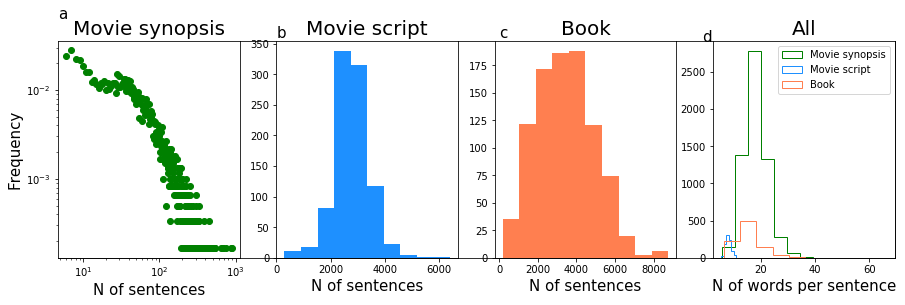

In [56]:
def probability_distribution_function(x):
    for i in range(len(x)):
        if x[i]<=0:
            x[i]=1
    countdict=Counter(x)
    for key in countdict.keys():
        countdict[key]/=len(x)
    x=list(countdict.keys())
    y=list(countdict.values())
    return x,y

fig = plt.figure(figsize=(15,4))
plt.text(0,1.1,'a',fontsize=15)
plt.xticks([])
plt.yticks([])
ax=fig.add_subplot(141)
x,y=probability_distribution_function(IMDB['len'].values)
plt.plot(x,y,color='g',marker='o',ls='')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N of sentences',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Movie synopsis',fontsize=20)


ax=fig.add_subplot(142)
plt.hist(movie_type['len'].values, histtype ='stepfilled',color='dodgerblue')
plt.xlabel('N of sentences',fontsize=15)
plt.title('Movie script',fontsize=20)
plt.text(-1.5,360,'b',fontsize=15)

ax=fig.add_subplot(143)
plt.hist(book['len'].values, histtype ='stepfilled',color='coral')
plt.xlabel('N of sentences',fontsize=15)
plt.title('Book',fontsize=20)
plt.text(-1.5,200,'c',fontsize=15)

ax=fig.add_subplot(144)
plt.hist(IMDB['avg'].values, histtype ='step',color='g',label='Movie synopsis')
plt.hist(movie_type['avg'].values, histtype ='step',color='dodgerblue',label='Movie script')
plt.hist(book['avg'].values, histtype ='step',color='coral',label='Book')
plt.text(-1.5,2900,'d',fontsize=15)
plt.title('All',fontsize=20)
plt.legend()
plt.xlabel('N of words per sentence',fontsize=15)
plt.savefig('./picture/figure8.tiff', dpi = 300)
plt.show()

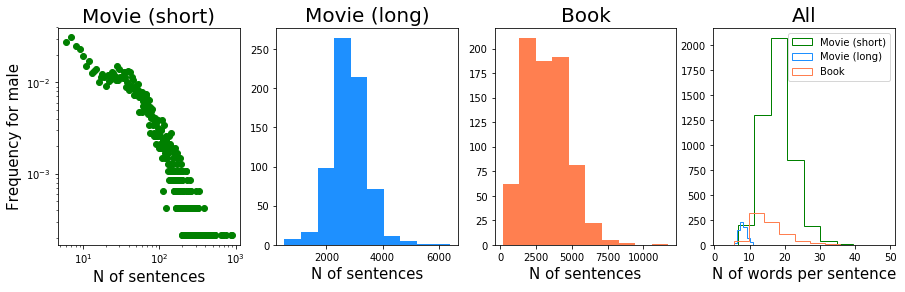

In [81]:
fig = plt.figure(figsize=(15,4))
ax=fig.add_subplot(141)
x,y=probability_distribution_function(IMDB_m['len'].values)
plt.plot(x,y,color='g',marker='o',ls='')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N of sentences',fontsize=15)
plt.ylabel('Frequency for male',fontsize=15)
plt.title('Movie (short)',fontsize=20)


ax=fig.add_subplot(142)
plt.hist(movie_type_m['len'].values, histtype ='stepfilled',color='dodgerblue')
plt.xlabel('N of sentences',fontsize=15)
plt.title('Movie (long)',fontsize=20)

ax=fig.add_subplot(143)
plt.hist(book_m['len'].values, histtype ='stepfilled',color='coral')
plt.xlabel('N of sentences',fontsize=15)
plt.title('Book',fontsize=20)

ax=fig.add_subplot(144)
plt.hist(IMDB_m['avg'].values, histtype ='step',color='g',label='Movie (short)')
plt.hist(movie_type_m['avg'].values, histtype ='step',color='dodgerblue',label='Movie (long)')
plt.hist(book_m['avg'].values, histtype ='step',color='coral',label='Book')
plt.title('All',fontsize=20)
plt.legend()
plt.xlabel('N of words per sentence',fontsize=15)
# plt.savefig('./paper/The distribution of sentence and words.tiff', dpi = 300)
plt.show()

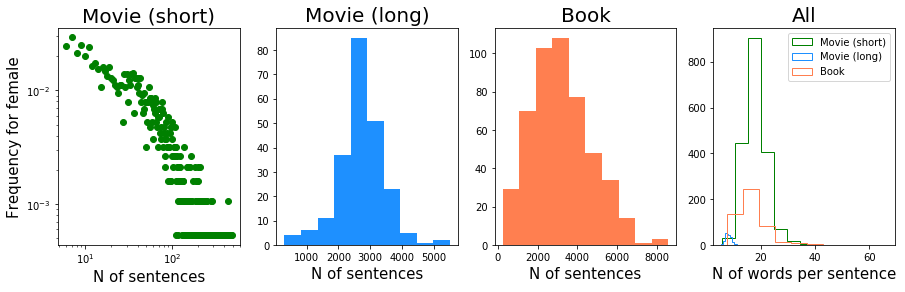

In [82]:
fig = plt.figure(figsize=(15,4))
ax=fig.add_subplot(141)
x,y=probability_distribution_function(IMDB_f['len'].values)
plt.plot(x,y,color='g',marker='o',ls='')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N of sentences',fontsize=15)
plt.ylabel('Frequency for female',fontsize=15)
plt.title('Movie (short)',fontsize=20)


ax=fig.add_subplot(142)
plt.hist(movie_type_f['len'].values, histtype ='stepfilled',color='dodgerblue')
plt.xlabel('N of sentences',fontsize=15)
plt.title('Movie (long)',fontsize=20)

ax=fig.add_subplot(143)
plt.hist(book_f['len'].values, histtype ='stepfilled',color='coral')
plt.xlabel('N of sentences',fontsize=15)
plt.title('Book',fontsize=20)

ax=fig.add_subplot(144)
plt.hist(IMDB_f['avg'].values, histtype ='step',color='g',label='Movie (short)')
plt.hist(movie_type_f['avg'].values, histtype ='step',color='dodgerblue',label='Movie (long)')
plt.hist(book_f['avg'].values, histtype ='step',color='coral',label='Book')
plt.title('All',fontsize=20)
plt.legend()
plt.xlabel('N of words per sentence',fontsize=15)
# plt.savefig('./paper/The distribution of sentence and words.tiff', dpi = 300)
plt.show()

In [156]:
def get_maintext_lines_script(raw_text):
    lines = raw_text.split("\n")
    start_book_i = 0
    end_book_i = len(lines)-1
    if end_book_i == len(lines)-1:
        for j,line in enumerate(lines):
            if "FADE OUT" in line and j>.9*len(lines):
                end_book_i = j
    if end_book_i == len(lines)-1:
        for j,line in enumerate(lines):
            if "THE END" in line and j>.9*len(lines):
                end_book_i = j
    return lines[(start_book_i+1):(end_book_i)]

In [171]:
def chunkify(lines):
    # put them back together...
    raw_text = "\n".join(lines)
    # remove extra whitespace
    raw_text_1 = re.sub("\n[\\s]+?\n","\n\n",raw_text)
    # remove singleton newlines
    raw_text_2 = re.sub(r"([^\n])\n([^\n])",r"\1 \2",raw_text_1)
    raw_text_3 = raw_text_2.rstrip().lstrip()


    # split on those triples (or more)
    big_chunks = re.split("\n\n\n+",raw_text_3)

    big_chunks = [i for i in big_chunks if len(re.split('\n',i))>50] #remove title,author et al.
    
    if len(big_chunks)!=1:
        print('error chunk!')
#         big_chunks = '\n\n'.join(lines)
        
    # break into different cuts
    big_chunks = re.split("CUT TO:",big_chunks[0])
#     print(big_chunks)
    # now break them into the paragraphs
    small_chunks = list(map(lambda x: re.split("\n\n",x),big_chunks))
    combined_chunks = []
    [combined_chunks.extend(el) for el in small_chunks]
    combined_chunks = [i for i in combined_chunks if len(i.strip())>0]
#     combined_chunks = ' '.join(combined_chunks)
#     combined_chunks = []

#     for i in range(len(small_chunks)):
#         for j in range(len(small_chunks[i])):
#             combined_chunks.append((i,j,small_chunks[i][j]))
    return combined_chunks
#     return small_chunks

In [172]:
def main_character(lead):
    lead=[i.title() for i in lead]
    film_name_list = (set(lead) & set(male_names)) |\
                    (set(lead) & set(female_names))
    film_script_wordlist_counter = Counter(lead)
    df = pd.DataFrame([[i, film_script_wordlist_counter[i]] for i in film_name_list]\
                                      , columns=['name', 'count'])
    df['gender']=df['name'].apply(lambda x:'male' if x in male_names else 'female')
    df=df.sort_values(by='count', ascending=False)
    lead = df['name'].values[0]
    lead_gender=df['gender'].values[0]
    if lead_gender=='female':
        lead1=df[df['gender']=='male']['name'].values[0]
    else:
        lead1=df[df['gender']=='female']['name'].values[0]
    return lead,lead_gender,lead1

In [178]:
f = open('./imsdb/'+'Titanic'+'.txt',"r")
rawtext = f.read()
f.close()
lines = get_maintext_lines_script(rawtext)
chunked = chunkify(lines)
# data=pre_process(' '.join(chunked)) #break into sentences
# data=['\t'.join(['_'.join([w, str(diction[w])]) for w in s if w in diction]) for s in data]

In [176]:
lines1=[]

for i in lines:
    if (0<len(tknzr.tokenize(i))<4):
        if (tknzr.tokenize(i)[-1][-1] not in string.punctuation) & (len(tknzr.tokenize(i))>0):
            lines1.append(i+'\n\n')
    else:
        lines1.append(i)

In [177]:
chunked = chunkify(lines1)

error chunk!


IndexError: list index out of range

In [214]:
# 获取名字，性别数据列表
from nltk.corpus import names
male_names = [name for name in names.words('male.txt')]
female_names = [name for name in names.words('female.txt')]
all_names = male_names+female_names

In [180]:
tknzr = WordPunctTokenizer()

In [181]:
lead_role=[]
for i,c in enumerate(chunked):
    t=[i.lower() for i in tknzr.tokenize(c)]
    if (t[-1][-1] not in string.punctuation) & (len(t)<4):
        lead_role.extend(t)
lead,lead_gender,lead1=main_character(lead_role)

In [182]:
lead,lead_gender,lead1

('Rose', 'female', 'Jack')

In [183]:
common=[]
for i,c in enumerate(chunked):
    t=[i.lower() for i in tknzr.tokenize(c)]
    if t[-1][-1] in string.punctuation:
        if (lead.lower() in t)&(lead1.lower() in t):
            common.append(i)

In [184]:
len(common)

131

In [185]:
common1=[]
for i,c in enumerate(chunked):
    t=[i.lower() for i in tknzr.tokenize(c)]
    if t[-1][-1] not in string.punctuation:
        common1.append([i,t])

In [186]:
a=[]
t=4
for i in range(1,len(common1)-1):
    if (lead.lower() in common1[i][1])&(lead1.lower() in common1[i-1][1]):
        if (common1[i+1][0]-common1[i][0])<t: #4 is a threshold of dialoge length
            a.extend([j for j in range(common1[i-1][0],common1[i+1][0])])
        else:
            a.extend([j for j in range(common1[i-1][0],common1[i][0]+t)])
    if (lead.lower() in common1[i-1][1])&(lead1.lower() in common1[i][1]):
        if (common1[i+1][0]-common1[i][0])<t: #4 is a threshold of dialoge length
            a.extend([j for j in range(common1[i-1][0],common1[i+1][0])])
        else:
            a.extend([j for j in range(common1[i-1][0],common1[i][0]+t)])
    if (lead.lower() in common1[i][1])&(lead1.lower() in common1[i][1]):
        a.extend([common1[i][0]])

In [187]:
a=a+common

In [188]:
a=sorted(list(set(a)))

In [218]:
d=pd.DataFrame()
d['sentence']=chunked
d['index']=d.index
d['tp']=d['index'].apply(lambda x: 'yes' if x in a else np.nan)
d['include']=d['sentence'].apply(lambda x: 'no' if ([i.lower() for i in tknzr.tokenize(x)][-1][-1] \
                not in string.punctuation) & (len([i.lower() for i in tknzr.tokenize(x)])<6) else 'yes')    
d=d[d['include']=='yes']
d=d.reset_index(drop=False)
tp=d[d['tp']=='yes'].index
d['emotion']=d['sentence'].apply(lambda x: word_to_emotion(x))
w=d['emotion'].values
w=[0 if np.isnan(i)==True else i for i in w]

/home/sysadmin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
